# MULTIPLE LINEAR REGRESSION

## 1.Perform exploratory data analysis (EDA) to gain insights into the # dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
file_path = "ToyotaCorolla - MLR.csv"
df = pd.read_csv(file_path)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [9]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [11]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [15]:
df = df.drop(columns = ['Cylinders'], axis = 1)

In [17]:
df = pd.get_dummies(df, drop_first=True)

In [19]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,True,False
1,13750,23,72937,90,0,2000,3,5,1165,True,False
2,13950,24,41711,90,0,2000,3,5,1165,True,False
3,14950,26,48000,90,0,2000,3,5,1165,True,False
4,13750,30,38500,90,0,2000,3,5,1170,True,False


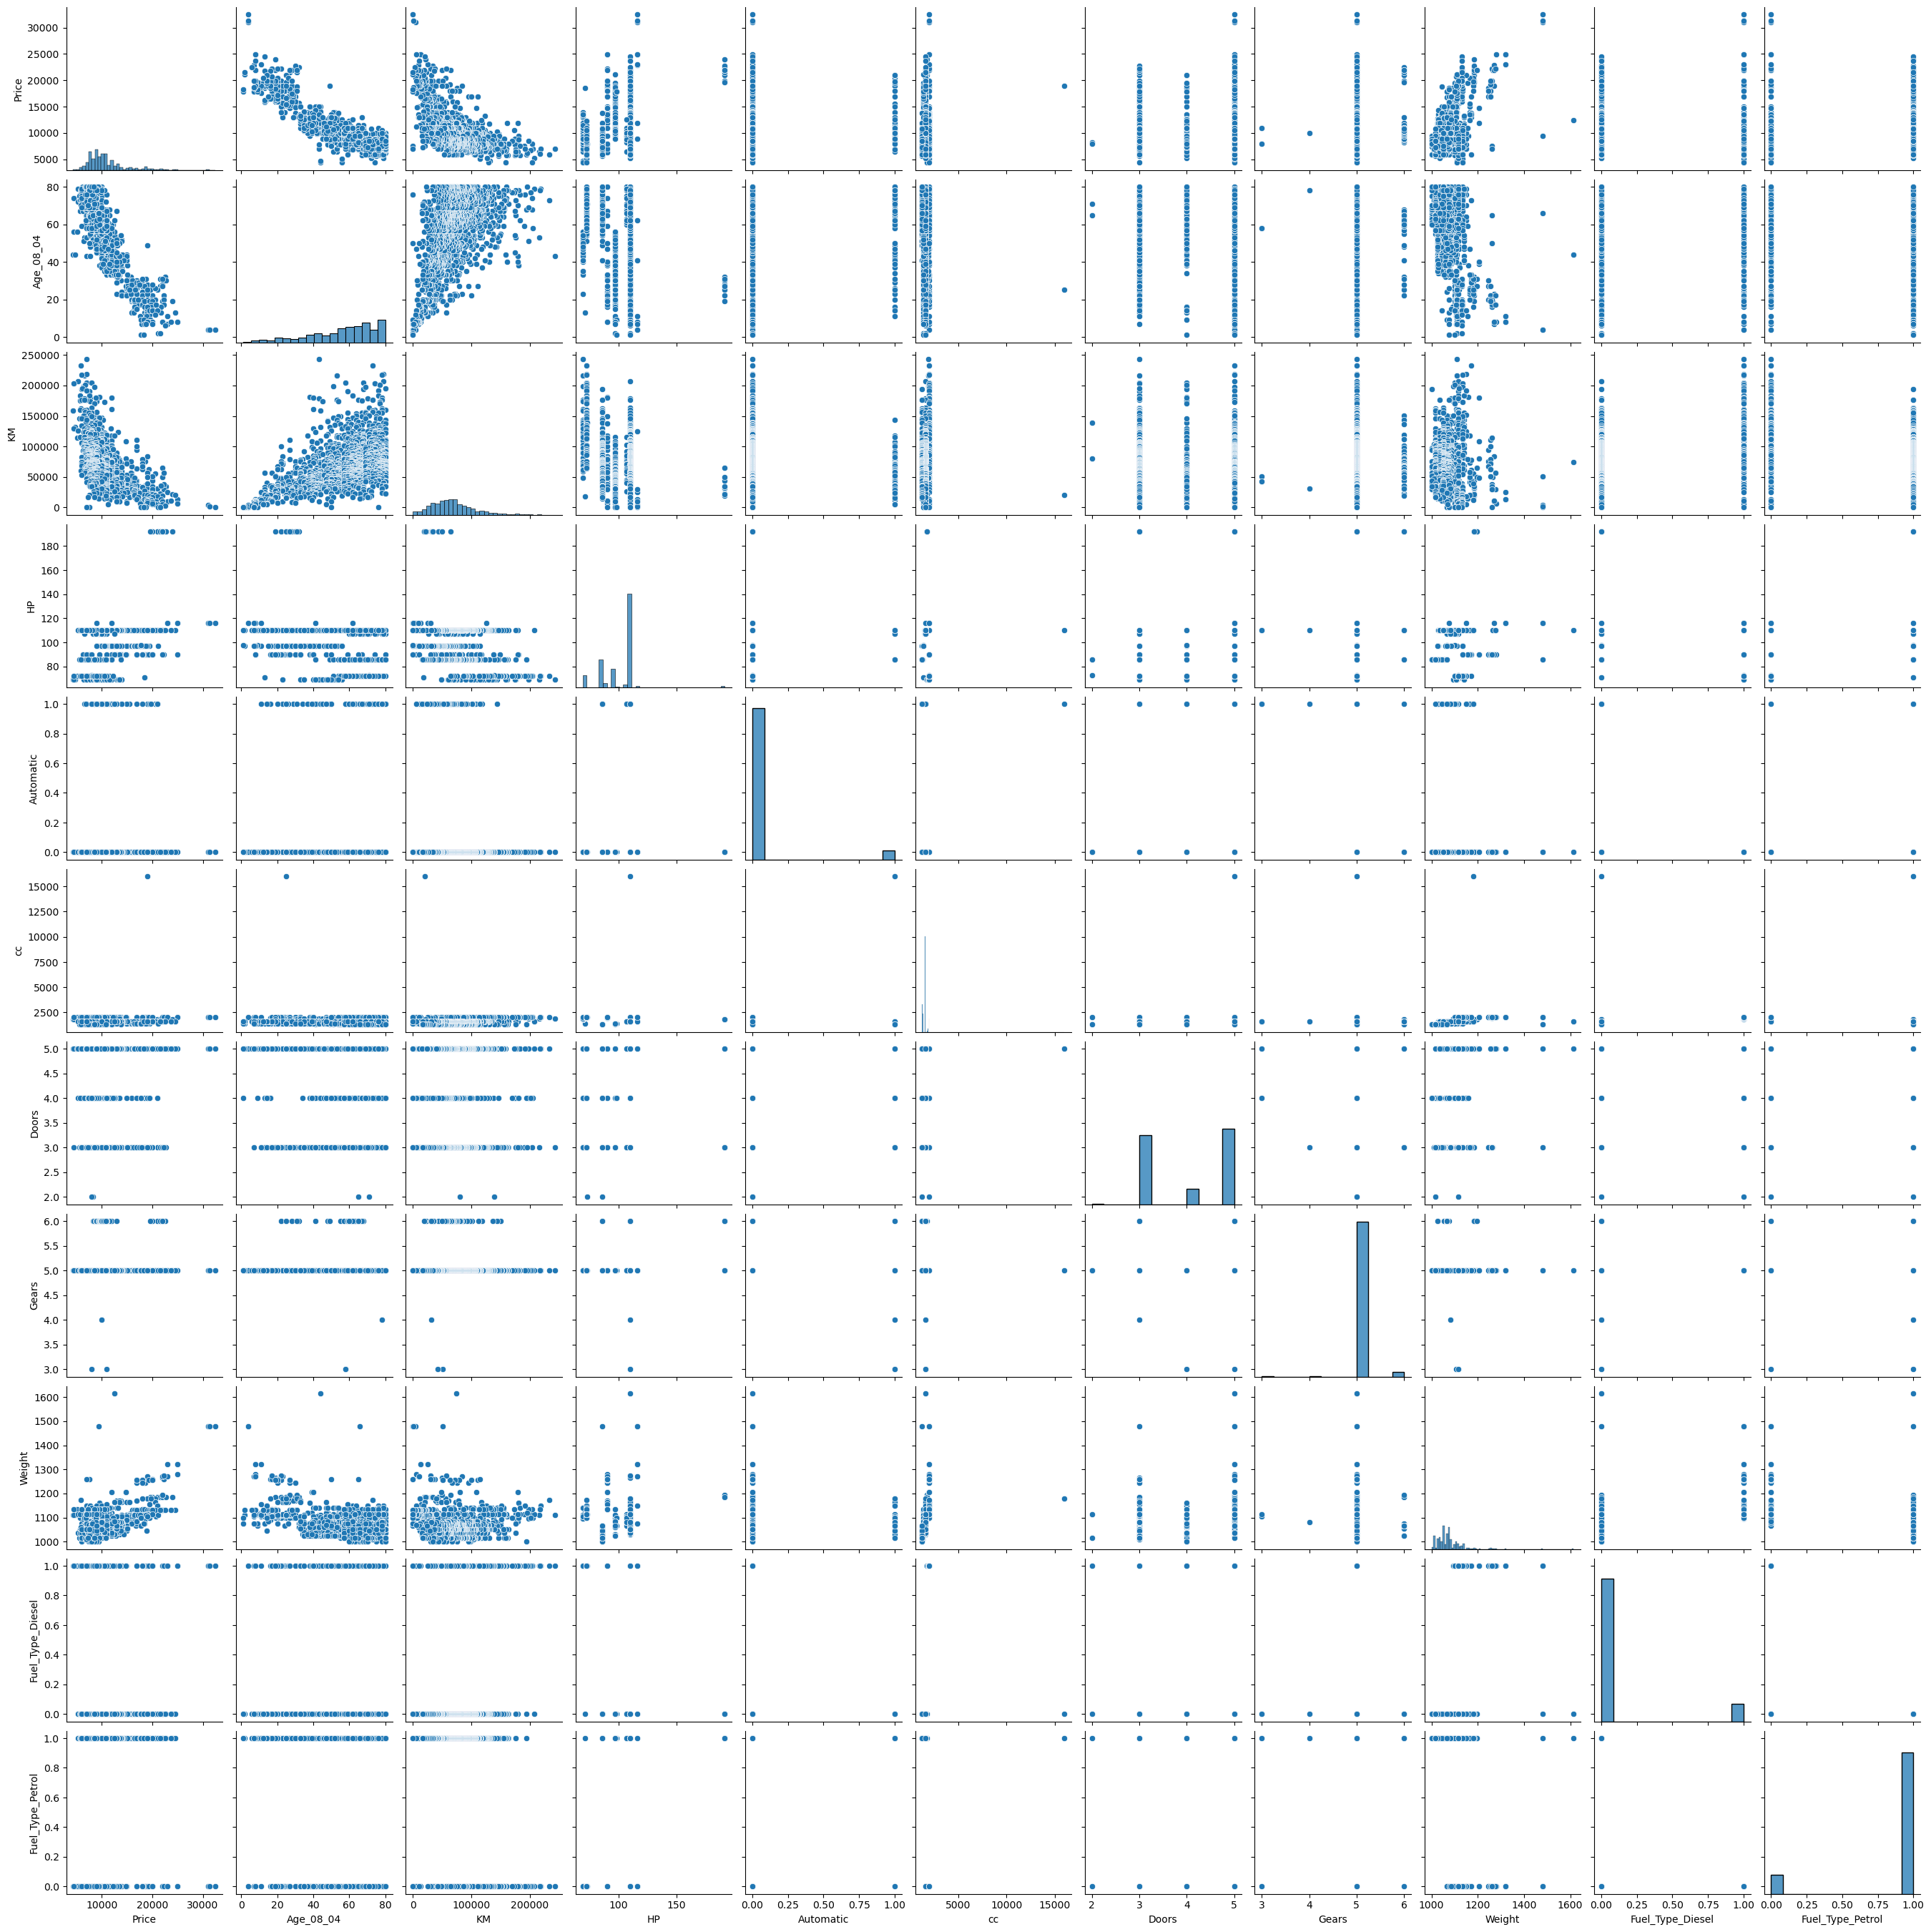

In [21]:
sns.pairplot(df)
plt.show()

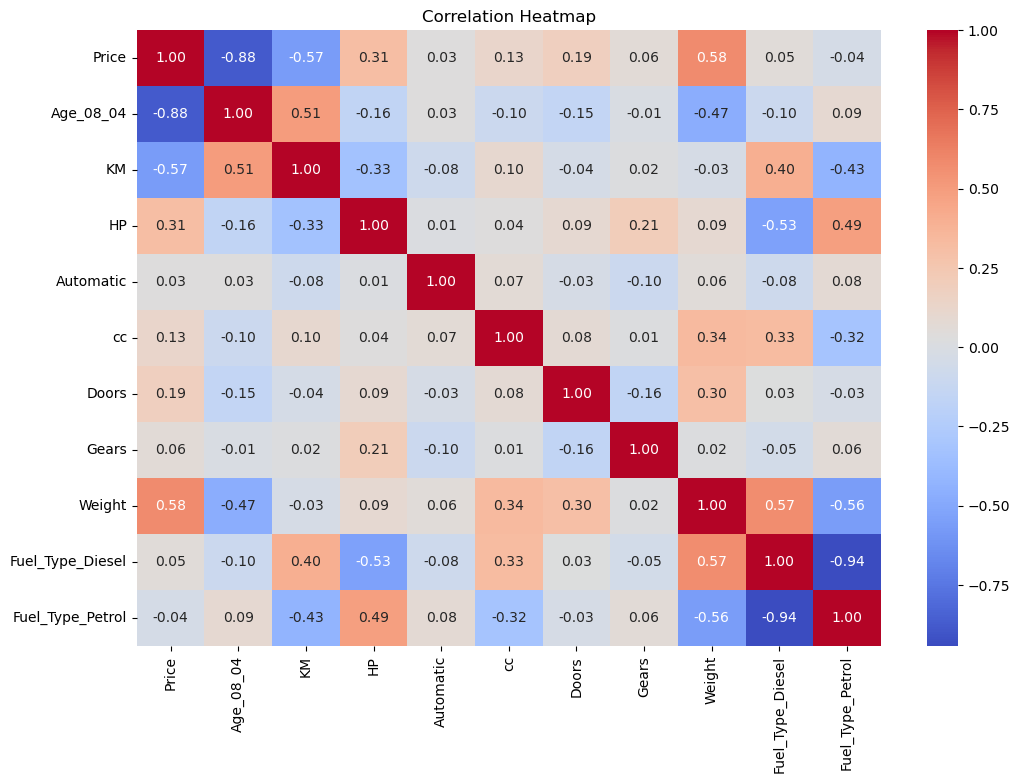

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [25]:
from sklearn.model_selection import train_test_split

# Define target variable (Y) and feature variables (X)
X = df.drop(columns=['Price'])
y = df['Price']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1148, 10)
Testing set size: (288, 10)


## Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model.

In [31]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Model coefficients and intercept
print("Intercept:", model1.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model1.coef_):
    print(f"{feature}: {coef:.2f}")

Intercept: -14255.385993565247
Coefficients:
Age_08_04: -120.83
KM: -0.02
HP: 14.04
Automatic: 148.83
cc: -0.03
Doors: -60.31
Gears: 551.60
Weight: 25.88
Fuel_Type_Diesel: -68.55
Fuel_Type_Petrol: 1370.81


 ## 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model1.predict(X_test)

# Model evaluation
print("R-squared Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R-squared Score: 0.8348888040611083
Mean Squared Error: 2203043.823143701


## 5.Apply Lasso and Ridge methods on the model.

In [35]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Compare performance
print("Lasso Regression R-squared:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))

print("Ridge Regression R-squared:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))


Lasso Regression R-squared: 0.850234824426064
Lasso Regression MSE: 1998285.1138229507
Ridge Regression R-squared: 0.8461256934275695
Ridge Regression MSE: 2053112.3810669717
